In [63]:
import torch
import pandas

In [64]:
data = pandas.read_csv("data.csv", index_col=None)
# data.rename(columns ={'Unnamed: 0': 'id'}, inplace = True)


In [65]:
data

,Unnamed: 0.1,Unnamed: 0,id,frame_id,timestamp_ms,agent_type,x,y,vx,vy,psi_rad,length,width,velocity,ang_vel
0,0,0,0,0,0,car,-14.351,4.636,0.025,-0.012,-0.434,4.0,1.8,0.027731,0.00
1,1,1,0,1,100,car,-14.349,4.634,0.003,-0.001,-0.434,4.0,1.8,0.003162,0.00
2,2,2,0,2,200,car,-14.349,4.634,-0.013,0.006,-0.434,4.0,1.8,0.014318,0.00
3,3,3,0,3,300,car,-14.350,4.635,-0.020,0.009,-0.434,4.0,1.8,0.021932,0.00
4,4,4,0,4,400,car,-14.352,4.636,-0.015,0.007,-0.434,4.0,1.8,0.016553,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67560,67560,67560,4536,8992,899200,car,-20.550,-2.083,2.769,-1.803,-0.577,4.0,1.8,3.304265,-0.03
67561,67561,67561,4536,8993,899300,car,-20.276,-2.268,2.712,-1.780,-0.581,4.0,1.8,3.243970,-0.04
67562,67562,67562,4536,8994,899400,car,-20.008,-2.451,2.665,-1.763,-0.584,4.0,1.8,3.195371,-0.03
67563,67563,67563,4536,8995,899500,car,-19.745,-2.633,2.634,-1.755,-0.588,4.0,1.8,3.165119,-0.04


In [75]:
vector_map = dict()
for i in data.id.unique():
    temp_data = data[data['id']==i]
    vec_list = list()
    for iter,row in temp_data.iterrows():
        vec = [float(row.x),float(row.y),float(row.timestamp_ms)]
        vec_list.append(vec)
    vector_map[i] = torch.tensor(vec_list).to("cuda")


In [76]:
vector_map[0]

tensor([[-1.4351e+01,  4.6360e+00,  0.0000e+00],
        [-1.4349e+01,  4.6340e+00,  1.0000e+02],
        [-1.4349e+01,  4.6340e+00,  2.0000e+02],
        ...,
        [ 1.3949e+01,  1.3790e+01,  3.9000e+04],
        [ 1.4428e+01,  1.4365e+01,  3.9100e+04],
        [ 1.4881e+01,  1.4920e+01,  3.9200e+04]], device='cuda:0')

In [88]:
from math import sin,cos
angular_transform = torch.zeros(3,3).to("cuda")
linear_transform = torch.tensor([-0.08,-0.05])
phi = 0.04

In [89]:
angular_transform[0][0] = cos(phi)
angular_transform[0][1] = sin(phi)
angular_transform[1][0] = -1*sin(phi)
angular_transform[1][1] = cos(phi)
angular_transform[2][2] = 1

In [90]:
angular_transform

tensor([[ 0.9992,  0.0400,  0.0000],
        [-0.0400,  0.9992,  0.0000],
        [ 0.0000,  0.0000,  1.0000]], device='cuda:0')

In [87]:
t = torch.tensor([-8.244000000000028,2.6680000000000064,1]).to("cuda")
t = t-
k = t@angular_transform

In [80]:



linear_transform = torch.tensor([1.0,2.0,0]).to("cuda")
linear_transform.to("cuda")

result_map = dict()
for i in vector_map:
    # vector_map[i] = vector_map[i] - linear_transform
    vector_map[i] = torch.bmm(vector_map[i].unsqueeze(0),angular_transform.unsqueeze(0)).squeeze() - linear_transform


In [81]:
vector_map[0][0] 

tensor([-15.4621,  -6.2769,   0.0000], device='cuda:0')

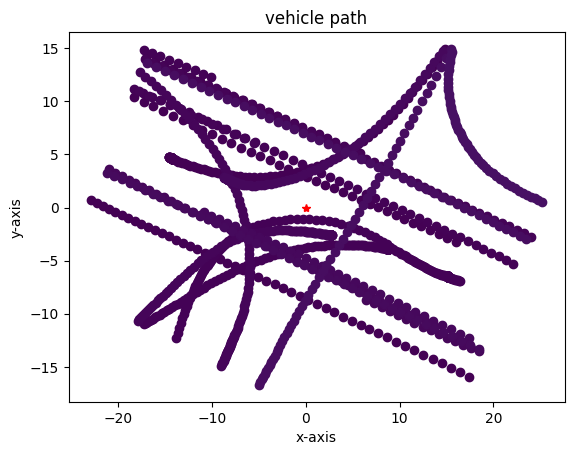

In [3]:
import matplotlib.pyplot as plt
import pandas
import matplotlib.colors as mcolors
import matplotlib.cm as cm

color_map = cm.viridis

data = pandas.read_csv("data.csv")
norm = mcolors.Normalize(vmin=0, vmax=len(data.id.unique()))

fig, ax = plt.subplots()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('vehicle path')
plt.ion()  # Turn on interactive mode for dynamic updating

for i in data.id.unique()[:20]:
    data_temp = data[data['id']==i]
    color = color_map(norm(i))

    # for _,row in data_temp.iterrows():
    ax.scatter(data_temp.x.to_list(),data_temp.y.to_list(),c=[color])

ax.plot(0,0,c="red",marker = "*")
plt.ioff()
plt.show()



Clustering of Lidar 


In [1]:
import torch


In [2]:
import torch
import numpy as np
lidar = np.array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11.366155624389648, 11.075774192810059, 10.803101539611816, 10.546699523925781, 10.305283546447754, 10.404522895812988, 10.554227828979492, 10.711647987365723, 10.877232551574707, 11.051470756530762, 11.234895706176758, 11.428088188171387, 11.631683349609375, 11.84637451171875, 12.072925567626953, 12.312172889709473, 12.56503963470459, 12.832541465759277, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11.869912147521973, 11.822927474975586, 11.779923439025879, 11.74083137512207, 11.705587387084961, 11.6741361618042, 11.646427154541016, 12.665647506713867, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
filter_lidar = lidar[lidar<16]

In [3]:
filter_lidar


array([11.36615562, 11.07577419, 10.80310154, 10.54669952, 10.30528355,
       10.4045229 , 10.55422783, 10.71164799, 10.87723255, 11.05147076,
       11.23489571, 11.42808819, 11.63168335, 11.84637451, 12.07292557,
       12.31217289, 12.56503963, 12.83254147, 11.86991215, 11.82292747,
       11.77992344, 11.74083138, 11.70558739, 11.67413616, 11.64642715,
       12.66564751])

In [4]:
from math import degrees,sqrt,sin,cos
from std_msgs.msg import Int64MultiArray
import cmath

# count_threshold = 4
# length_threshold = sqrt((5**2)+(3.8**2))
tensor_set = list()
for i in filter_lidar:
        thetha = np.argwhere(lidar == i)[0][0]*0.017
        # z = complex(i*cos((lidar.index(i))*0.017),i*sin(lidar.index(i)*0.017))
        point_tensor = [float(i)*cos(thetha),float(i)*sin(thetha)]
        tensor_set.append(point_tensor)

tensors = torch.tensor(tensor_set).to('cuda')


In [5]:
tensors

tensor([[-0.8880, 11.3314],
        [-1.0529, 11.0256],
        [-1.2096, 10.7352],
        [-1.3589, 10.4588],
        [-1.5013, 10.1953],
        [-1.6905, 10.2663],
        [-1.8916, 10.3833],
        [-2.0987, 10.5040],
        [-2.3122, 10.6286],
        [-2.5324, 10.7574],
        [-2.7600, 10.8906],
        [-2.9954, 11.0286],
        [-3.2391, 11.1716],
        [-3.4918, 11.3201],
        [-3.7542, 11.4744],
        [-4.0270, 11.6350],
        [-4.3109, 11.8024],
        [-4.6070, 11.9771],
        [-8.1620,  8.6184],
        [-8.2744,  8.4449],
        [-8.3862,  8.2728],
        [-8.4973,  8.1021],
        [-8.6079,  7.9326],
        [-8.7180,  7.7642],
        [-8.8277,  7.5968],
        [-9.7393,  8.0972]], device='cuda:0')

In [6]:
car_pose = torch.tensor([[-5.095668,14.788768-2.46666],[-9.186936,9.929110-2.46666]]).to('cuda')

In [7]:
for i in torch.cdist(tensors,car_pose):
        #  print(torch.argmin(i)) 
        print(torch.argmin(i))
        # print(i)

tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')


In [8]:
norm_tensor

NameError: name 'norm_tensor' is not defined

/home/akshit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


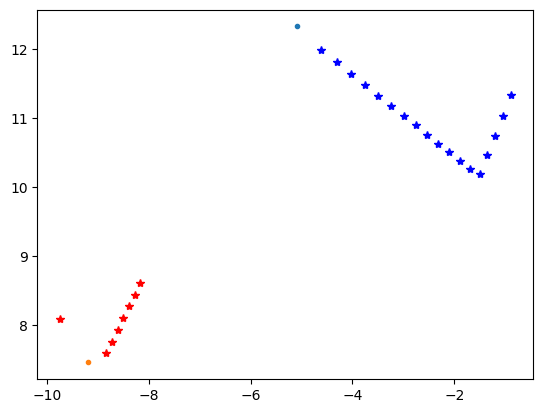

In [9]:
import matplotlib.pyplot as plt

color = {0: 'blue', 1: 'red'}

norm_tensor = torch.cdist(tensors,car_pose)
cnt = 0
plt.plot(car_pose[0][0].item(),car_pose[0][1].item(),marker = ".")
plt.plot(car_pose[1][0].item(),car_pose[1][1].item(),marker = ".")
for i in tensors:
    plt.plot(i[0].item(),i[1].item(),c = color[torch.argmin(norm_tensor[cnt]).item()],marker = "*")
    # print(torch.argmin(norm_tensor[cnt]).item())
    cnt+=1
plt.show()

EUCLEDEAN CLUSTERING

In [124]:
import torch
import numpy as np
from scipy.spatial.distance import cdist
index_dict = dict()
lidar_data = np.array([3.994678020477295, 4.022257328033447, 4.0514750480651855, 4.082386016845703, 4.115047931671143, 4.149524211883545, 4.185882091522217, 4.224193572998047, 4.264537811279297, 4.306997776031494, 4.351664066314697, 4.398634910583496, 4.448013782501221, 4.499914646148682, 4.5544586181640625, 4.6117777824401855, 4.672014236450195, 4.735321521759033, 4.801865577697754, 4.871827125549316, 4.945401668548584, 5.022801876068115, 5.104259014129639, 5.1900248527526855, 5.280375003814697, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 5.031928539276123, 4.532718658447266, 4.124775409698486, 3.7852671146392822, 3.4983925819396973, 3.2528679370880127, 3.0404205322265625, 2.854846477508545, 2.691403388977051, 2.5464024543762207, 2.4169323444366455, 2.3006646633148193, 2.1957144737243652, 2.1005399227142334, 2.013867139816284, 1.9346352815628052, 1.8619531393051147, 1.8672007322311401, 1.8836941719055176, 1.9010719060897827, 1.9193693399429321, 1.9386247396469116, 1.9588793516159058, 1.9801772832870483, 2.0025665760040283, 2.0260984897613525, 2.050828456878662, 2.0768165588378906, 2.1041276454925537, 2.132831573486328, 2.1630043983459473, 2.194728136062622, 2.2280919551849365, 2.263193130493164, 2.3001368045806885, 2.339038610458374, 2.380023717880249, 2.423229932785034, 2.4688072204589844, 2.5169215202331543, 2.567754030227661, 2.6215054988861084, 2.6783974170684814, 2.7386746406555176, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
# lidar_data = lidar_data[lidar_data<16]
vel_list = np.zeros(lidar_data.shape[0])

tensor = torch.tensor(lidar_data).to('cuda')



In [125]:
lidar_data.shape[0]

180

In [126]:
def batch_slice_tensor(tensor):
    result = []
    current_subarray = []

    for element in tensor:
        if element < 16:
            current_subarray.append(element)
        else:
            if current_subarray:
                result.append(torch.tensor(current_subarray).to('cuda'))
                current_subarray = []
    if current_subarray:
        result.append(torch.tensor(current_subarray).to('cuda'))

    return result

In [127]:
l = batch_slice_tensor(tensor=tensor)

In [128]:
lenth_threshold = 0.09 #parameter

In [129]:
from math import sin,cos
cluster = list()
lenth_threshold = 0.4
for i in l:
    temp_cluster = list()
    tensor_set = list()
    for j in i:
        thetha = np.argwhere(lidar_data == j.item())[0][0]*0.017
        # z = complex(i*cos((lidar.index(i))*0.017),i*sin(lidar.index(i)*0.017))
        point_tensor = [float(j.item())*cos(thetha),float(j.item())*sin(thetha)]
        index_dict[point_tensor[0]] = j.item()
        tensor_set.append(point_tensor)
    
    tensor_set_ = torch.tensor(tensor_set).to('cuda')

    for k in range(1,len(tensor_set)):
        length = torch.norm(tensor_set_[k]-tensor_set_[k-1])
        # print(length)
        if abs(length.item())>lenth_threshold:
            cluster.append(temp_cluster)
            temp_cluster = list()
            # print("thresh")
        
        temp_cluster.append(tensor_set[k])
        # print(temp_cluster)
    if temp_cluster:
        cluster.append(temp_cluster)
        

    


In [130]:
m_list = list()
for i in cluster:
    if i:
        m_list.append(np.mean(i,axis=0).tolist())
m_list = np.array(m_list)

In [131]:
m_list

array([[ 4.39487931,  0.99279313],
       [ 0.18486698,  4.52894719],
       [-0.70957144,  2.21999399]])

In [132]:
arr1 = np.array([[ 4.39528485,  0.99289812],
       [ 0.18490551,  4.52989102],
       [-0.70995157,  2.22119054]])

arr2 = np.array([[ 4.39487931,  0.99279313],
       [ 0.18486698,  4.52894719],
       [-0.70957144,  2.21999399],
       ])

dist = cdist(arr1,arr2)

In [133]:
cluster.remove([])

In [136]:
for i in range(m_list.shape[0]):
    id = np.argmin(dist[i]) #id refers to cluster id
    velocity = dist[i][id]/0.03
    # print(velocity)
    # print(cluster[id])
    for k in cluster[id]:
        idx = np.where(lidar_data == index_dict[k[0]])[0].item()
        print(index_dict[k[0]])
        vel_list[idx] = velocity




4.022257328033447
4.0514750480651855
4.082386016845703
4.115047931671143
4.149524211883545
4.185882091522217
4.224193572998047
4.264537811279297
4.306997776031494
4.351664066314697
4.398634910583496
4.448013782501221
4.499914646148682
4.5544586181640625
4.6117777824401855
4.672014236450195
4.735321521759033
4.801865577697754
4.871827125549316
4.945401668548584
5.022801876068115
5.104259014129639
5.1900248527526855
5.280375003814697
4.532718658447266
4.124775409698486
3.7852671146392822
3.4983925819396973
3.2528679370880127
3.0404205322265625
2.854846477508545
2.691403388977051
2.5464024543762207
2.4169323444366455
2.3006646633148193
2.1957144737243652
2.1005399227142334
2.013867139816284
1.9346352815628052
1.8619531393051147
1.8672007322311401
1.8836941719055176
1.9010719060897827
1.9193693399429321
1.9386247396469116
1.9588793516159058
1.9801772832870483
2.0025665760040283
2.0260984897613525
2.050828456878662
2.0768165588378906
2.1041276454925537
2.132831573486328
2.1630043983459473
2

In [135]:
vel_list

array([0.        , 0.01396367, 0.01396367, 0.01396367, 0.01396367,
       0.01396367, 0.01396367, 0.01396367, 0.01396367, 0.01396367,
       0.01396367, 0.01396367, 0.01396367, 0.01396367, 0.01396367,
       0.01396367, 0.01396367, 0.01396367, 0.01396367, 0.01396367,
       0.01396367, 0.01396367, 0.01396367, 0.01396367, 0.01396367,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [139]:
np.vstack((lidar_data,vel_list))


array([[3.99467802e+00, 4.02225733e+00, 4.05147505e+00, 4.08238602e+00,
        4.11504793e+00, 4.14952421e+00, 4.18588209e+00, 4.22419357e+00,
        4.26453781e+00, 4.30699778e+00, 4.35166407e+00, 4.39863491e+00,
        4.44801378e+00, 4.49991465e+00, 4.55445862e+00, 4.61177778e+00,
        4.67201424e+00, 4.73532152e+00, 4.80186558e+00, 4.87182713e+00,
        4.94540167e+00, 5.02280188e+00, 5.10425901e+00, 5.19002485e+00,
        5.28037500e+00, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.60000000e+01,
        1.60000000e+01, 1.60000000e+01, 1.60000000e+01, 1.600000

In [84]:
id

0

```
array([[ 4.39528485,  0.99289812],
       [ 0.18490551,  4.52989102],
       [-0.70995157,  2.22119054]])

array([[ 4.39487931,  0.99279313],
       [ 0.18486698,  4.52894719],
       [-0.70957144,  2.21999399]])
```

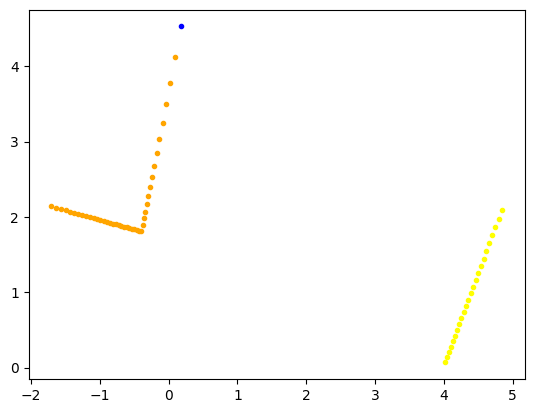

In [72]:
color = ["yellow","red",'blue','orange']
 
import matplotlib.pyplot as plt
cnt = 0
tot = 0
for i in cluster:
    for j in i:
        tot+=1
        plt.plot(j[0],j[1],color = color[cnt],marker = ".")
    cnt+=1
        # print(j)
plt.show()

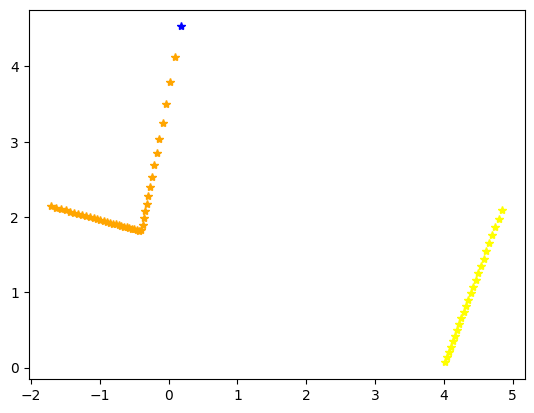

In [ ]:
color = ["yellow","red",'blue','orange']
 
import matplotlib.pyplot as plt
cnt = 0
tot = 0
for i in cluster:
    for j in i:
        tot+=1
        plt.plot(j[0].item(),j[1].item(),color = color[cnt],marker = "*")
    cnt+=1
        # print(j)
plt.show()

In [ ]:
cluster[0]

[tensor([4.0219, 0.0684], device='cuda:0'),
 tensor([4.0494, 0.1377], device='cuda:0'),
 tensor([4.0773, 0.2081], device='cuda:0'),
 tensor([4.1058, 0.2796], device='cuda:0'),
 tensor([4.1348, 0.3523], device='cuda:0'),
 tensor([4.1644, 0.4262], device='cuda:0'),
 tensor([4.1946, 0.5015], device='cuda:0'),
 tensor([4.2255, 0.5782], device='cuda:0'),
 tensor([4.2570, 0.6565], device='cuda:0'),
 tensor([4.2893, 0.7363], device='cuda:0'),
 tensor([4.3223, 0.8178], device='cuda:0'),
 tensor([4.3562, 0.9012], device='cuda:0'),
 tensor([4.3909, 0.9865], device='cuda:0'),
 tensor([4.4265, 1.0739], device='cuda:0'),
 tensor([4.4631, 1.1634], device='cuda:0'),
 tensor([4.5007, 1.2553], device='cuda:0'),
 tensor([4.5394, 1.3497], device='cuda:0'),
 tensor([4.5793, 1.4467], device='cuda:0'),
 tensor([4.6204, 1.5466], device='cuda:0'),
 tensor([4.6628, 1.6494], device='cuda:0'),
 tensor([4.7067, 1.7555], device='cuda:0'),
 tensor([4.7520, 1.8650], device='cuda:0'),
 tensor([4.7990, 1.9782], device

In [ ]:
np.mean(cluster[0].to)


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.